In [1]:
# Packages
import time
import datetime 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
ticker_symbols = ["Tesla: TSLA", "Netflix: NFLX", "Apple: AAPL", "Google: GOOGL", "Walmart: WMT", "nVIDIA: NVDA", "Amazon: AMZN"]
print("Common ticker symbols:" )
print(ticker_symbols)

Common ticker symbols:
['Tesla: TSLA', 'Netflix: NFLX', 'Apple: AAPL', 'Google: GOOGL', 'Walmart: WMT', 'nVIDIA: NVDA', 'Amazon: AMZN']


In [19]:
ticker = "TSLA"
period1 = int(time.mktime(datetime.datetime(2010, 7, 1).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 8, 30).timetuple()))
interval = "1d"
query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"

In [20]:
# Checking whether we pulled the correct data
df = pd.read_csv(query_string)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2806,2021-08-23,685.440002,712.130005,680.750000,706.299988,706.299988,20264900
2807,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2808,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2809,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300


In [5]:
# Checking whether the user wants the data in CSV or XLS -- Will have to remove for Jupyter Notebook
def menu():
    print("Would you like to export the data? \n 1. Yes \n 2. No")
    user = input()
    
    if user == "1":
        def menu2():
            print("Export to \n 3. CSV \n 4. Excel (XLS)")
            user2 = input()
            
            if user2 == "3":
                df.to_csv()
            else:
                df.to_excel()
    else:
        pass

In [21]:
df2 = df[["Date", "Adj Close"]]
df2.head()

,Date,Adj Close
0,2010-06-30,4.766
1,2010-07-01,4.392
2,2010-07-02,3.840
3,2010-07-06,3.222
4,2010-07-07,3.160


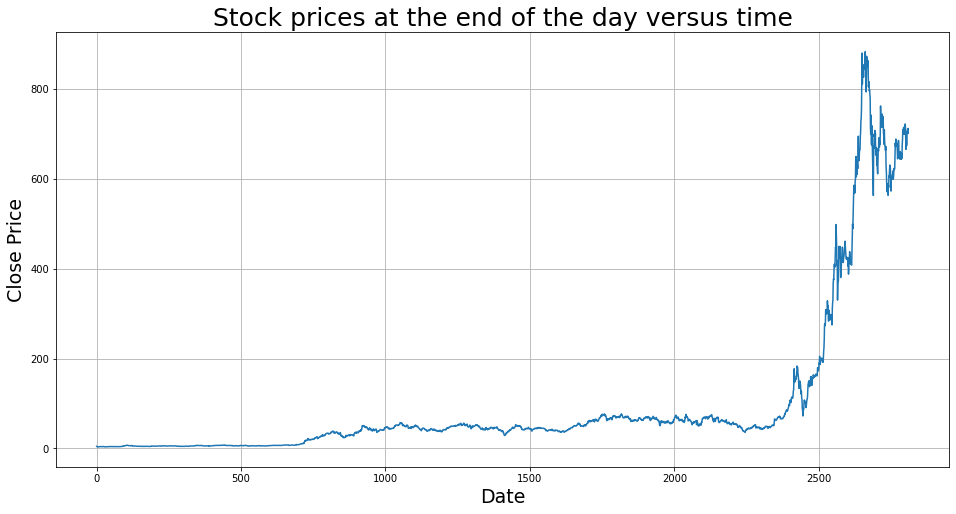

In [27]:
 # Plotting the data on a graph 
plt.figure(figsize = (16, 8))
plt.title("Stock prices at the end of the day versus time", fontsize = "25")
plt.xlabel("Date", fontsize = 19)
plt.ylabel("Close Price", fontsize = 19)
plt.plot(df["Adj Close"])
plt.grid()
plt.show()